In [93]:
import numpy as np
import pandas as pd
import torch
import keras
import os, gc, pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.medical.imaging import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.models import *
import torchvision.models as models
from fastai.callback.schedule import lr_find
from fastai.callback.schedule import *
from matplotlib import pyplot as plt
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *

In [94]:
print(os.listdir("D:\Sw\Python_project\BrainTumor1"))
DATA_DIR = "D:\Sw\Python_project\BrainTumor1\_brain_tumor_dataset"
os.listdir(f'{DATA_DIR}')

['no', 'yes', '_brain_tumor_dataset']


['no', 'yes']

In [95]:
data = ImageDataLoaders.from_folder(DATA_DIR, train=".", 
                                    valid_pct=0.25,
                                    ds_tfms=aug_transforms(do_flip=True, flip_vert=True, max_warp=0, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2),
                                    item_tfms=Resize(224),
                                    bs=24,
                                    val_bs=None,
                                    num_workers=0,
                                    batch_tfms=Normalize.from_stats(*imagenet_stats))

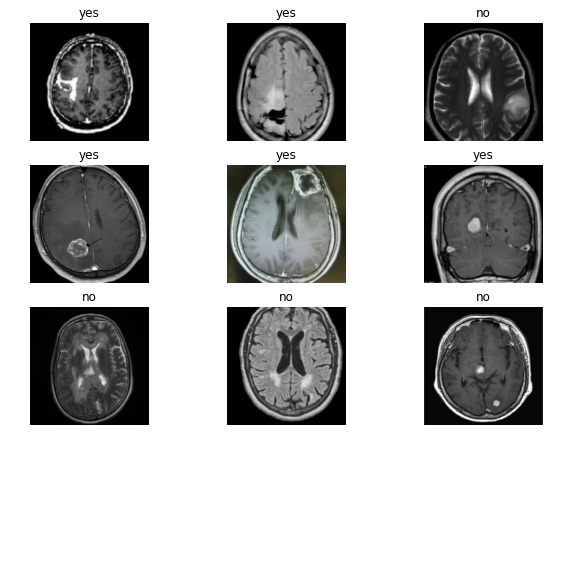

In [96]:
# print(f'Classes: \n {data.classes}')
data.show_batch(nrows=4, figsize=(10,10))

In [98]:
learner = cnn_learner(data, models.vgg16, metrics=accuracy, cbs=[ShowGraphCallback()], model_dir="D:\Sw\Python_project\model")

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=6.918309736647643e-06)

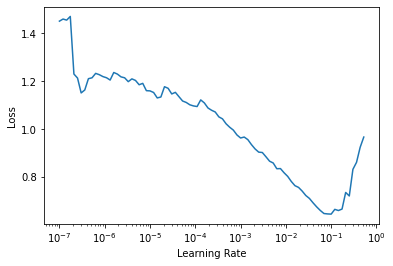

In [99]:
learner.lr_find()

In [100]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.794786,0.374553,0.850575,00:33
1,0.528702,0.218370,0.896552,00:33
2,0.422754,0.119193,0.942529,00:33
3,0.359070,0.055943,0.977012,00:34
4,0.319888,0.181842,0.919540,00:34
5,0.263373,0.130914,0.931035,00:34
6,0.240188,0.222199,0.919540,00:33
7,0.222644,0.242227,0.931035,00:34
8,0.199283,0.121397,0.965517,00:34
9,0.184716,0.041008,0.988506,00:34


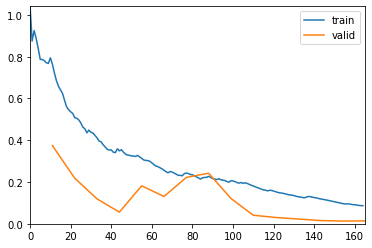

In [101]:
learner.fit_one_cycle(15, lr_max=slice(1e-3,1e-2), cbs=[ShowGraphCallback()])

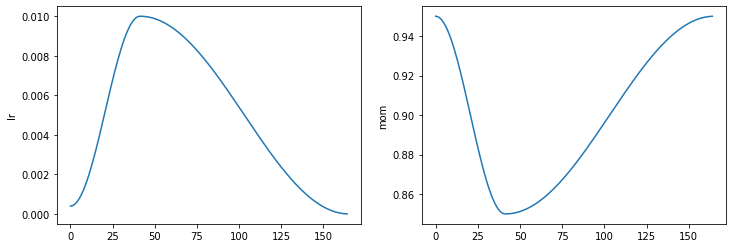

In [102]:
learner.cbs[1].plot_sched()

In [103]:
learner.save('D:\Sw\Python_project\working\stage_final1')

Path('D:/Sw/Python_project/working/stage_final1.pth')

In [110]:
learner.load('D:\Sw\Python_project\working\stage_final1')

In [111]:
learner.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.309573450380412e-07)

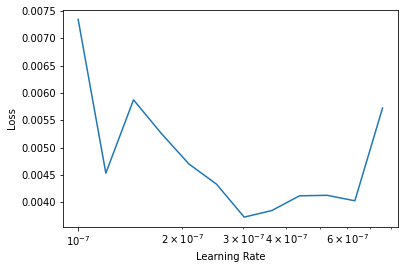

In [112]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.009959,0.014302,1.000000,01:31
1,0.023801,0.013339,1.000000,01:31
2,0.026725,0.016219,1.000000,01:32
3,0.053977,0.019047,1.000000,01:32
4,0.051411,0.011702,1.000000,01:32
5,0.058391,0.015197,1.000000,01:32
6,0.061488,0.015237,1.000000,01:32
7,0.048567,0.014990,1.000000,01:32
8,0.046867,0.016027,1.000000,01:32
9,0.044951,0.016085,1.000000,01:32


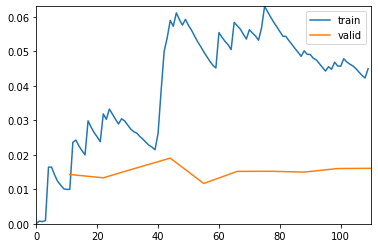

In [113]:
learner.fit_one_cycle(10, lr_max=slice(2e-07), cbs=[ShowGraphCallback()])

In [114]:
learner.save('D:\Sw\Python_project\working\stage_final1111')

Path('D:/Sw/Python_project/working/stage_final1111.pth')

In [115]:
interp = ClassificationInterpretation.from_learner(learner)

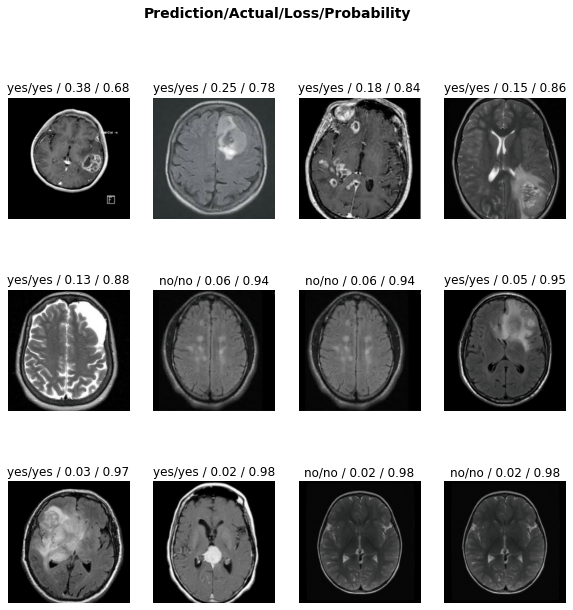

In [117]:
interp.plot_top_losses(12, figsize=(10,10))

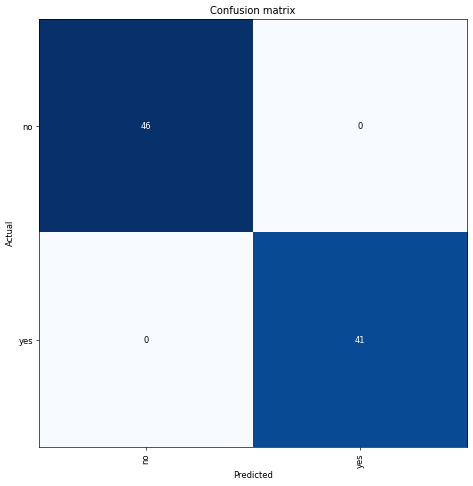

In [118]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)